In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_df = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_df['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            #name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_df['power_'+str(power)] = feature ** power
    return poly_df

In [6]:
dtype_dict = dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [7]:
house = pd.read_csv('kc_house_data.csv',dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [8]:
house = house.sort_values(by=['sqft_living','price'])

In [9]:
poly1_data = polynomial_dataframe(house['sqft_living'],1)

In [10]:
poly_power15 = polynomial_dataframe(house['sqft_living'],15)

In [11]:
from sklearn.linear_model import LinearRegression

In [15]:
lr1 = LinearRegression()

In [16]:
lr1.fit(poly1_data['power_1'].reshape(-1,1),house['price'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
prediction_1 = lr1.predict(poly1_data['power_1'].reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [18]:
lr2 = LinearRegression()
lr3 = LinearRegression()

In [19]:
lr2.fit(poly_power15[['power_1','power_2']],house['price'])
lr3.fit(poly_power15[['power_1','power_2','power_3']],house['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
prediction2 = lr2.predict(poly_power15[['power_1','power_2']])
prediction3 = lr3.predict(poly_power15[['power_1','power_2','power_3']])

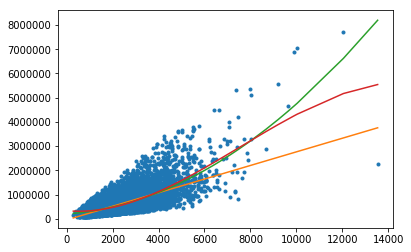

In [21]:
plt.plot(poly1_data['power_1'],house['price'],'.',poly_power15['power_1'],prediction_1,'-',poly_power15['power_1'],prediction2,'-',poly_power15['power_1'],prediction3,'-')

In [22]:
lr1.intercept_

-43580.743094473379

In [23]:
lr1.coef_

array([ 280.6235679])

In [24]:
lr2.coef_

array([  6.79940947e+01,   3.85812609e-02])

In [25]:
lr2.intercept_

199222.27930548601

In [26]:
lr3.coef_

array([ -9.01819864e+01,   8.70465089e-02,  -3.84055260e-06])

In [27]:
lr3.intercept_

336819.74822074623

In [28]:
lr15 = LinearRegression()

In [29]:
lr15.fit(poly_power15,house['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
prediction15 = lr15.predict(poly_power15)

In [31]:
lr15.intercept_

537116.3296380199

In [32]:
lr15.coef_

array([  4.56404164e-91,  -2.69409169e-50,   1.04861198e-55,
         4.97841222e-60,   0.00000000e+00,   2.68575170e-71,
         2.26147568e-67,   1.85900299e-63,   1.47144116e-59,
         1.09771012e-55,   7.43509038e-52,   4.23015578e-48,
         1.61618577e-44,  -2.49283826e-48,   9.59718336e-53])

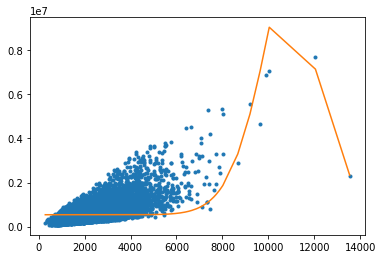

In [33]:
plt.plot(poly1_data['power_1'],house['price'],'.',poly1_data['power_1'],prediction15,'-')

In [34]:
set1 = pd.read_csv('wk3_kc_house_set_1_data.csv',dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set2 = pd.read_csv('wk3_kc_house_set_2_data.csv',dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set3 = pd.read_csv('wk3_kc_house_set_3_data.csv',dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set4 = pd.read_csv('wk3_kc_house_set_4_data.csv',dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [35]:
poly_power15.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


In [36]:
poly_15_set1 = polynomial_dataframe(set1['sqft_living'],15)
poly_15_set2 = polynomial_dataframe(set2['sqft_living'],15)
poly_15_set3 = polynomial_dataframe(set3['sqft_living'],15)
poly_15_set4 = polynomial_dataframe(set4['sqft_living'],15)

In [37]:
lr_set1 = LinearRegression()
lr_set2 = LinearRegression()
lr_set3 = LinearRegression()
lr_set4 = LinearRegression()

In [38]:
lr_set1.fit(poly_15_set1,set1['price'])
lr_set2.fit(poly_15_set2,set2['price'])
lr_set3.fit(poly_15_set3,set3['price'])
lr_set4.fit(poly_15_set4,set4['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
lr_set1.intercept_

539058.81866234494

In [40]:
lr_set1.coef_

array([  3.05794169e-90,  -8.00843839e-49,  -8.89252083e-55,
         0.00000000e+00,   0.00000000e+00,   1.10366089e-70,
         8.37724029e-67,   6.23411957e-63,   4.49156443e-59,
         3.06938763e-55,   1.91749300e-51,   1.01335180e-47,
         3.62176959e-44,  -5.63501661e-48,   2.18641117e-52])

In [41]:
lr_set2.intercept_

506919.97542769439

In [42]:
lr_set2.coef_

array([  2.69062842e-77,  -4.25459455e-39,   1.28357175e-44,
         2.12862850e-49,   2.08809743e-53,   0.00000000e+00,
         3.62468237e-55,   1.49667052e-51,   5.73503056e-48,
         1.95015189e-44,   5.37537394e-41,   9.37452648e-38,
        -3.62324594e-41,   4.63847493e-45,  -1.96476265e-49])

In [43]:
lr_set3.intercept_

530874.31665368262

In [44]:
lr_set3.coef_

array([  2.83751934e-88,  -9.22064758e-49,   1.05271552e-54,
         0.00000000e+00,   0.00000000e+00,   4.27894986e-69,
         2.68009626e-65,   1.63911362e-61,   9.66435015e-58,
         5.38044653e-54,   2.72563636e-50,   1.16253248e-46,
         3.33756141e-43,  -6.76238818e-47,   3.43132932e-51])

In [45]:
lr_set4.intercept_

494806.45898043155

In [46]:
lr_set4.coef_

array([  1.37062038e-76,  -7.34878296e-40,  -4.26685211e-44,
         2.76967601e-49,   0.00000000e+00,   0.00000000e+00,
         1.27051320e-54,   4.87799087e-51,   1.73524692e-47,
         5.46982657e-44,   1.39568453e-40,   2.25011157e-37,
        -9.43820715e-41,   1.31553952e-44,  -6.09071919e-49])

In [47]:
prediction15_set1 = lr_set1.predict(poly_15_set1)
prediction15_set2 = lr_set2.predict(poly_15_set2)
prediction15_set3 = lr_set3.predict(poly_15_set3)
prediction15_set4 = lr_set4.predict(poly_15_set4)

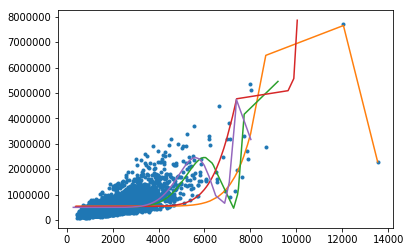

In [48]:
plt.plot(set1['sqft_living'],set1['price'],'.',poly_15_set1['power_1'],prediction15_set1,'-',
         poly_15_set2['power_1'],prediction15_set2,'-',
         poly_15_set3['power_1'],prediction15_set3,'-',poly_15_set4['power_1'],prediction15_set4,'-')

In [49]:
train_set = pd.read_csv('wk3_kc_house_train_data.csv',dtype=dtype_dict)
validation_set = pd.read_csv('wk3_kc_house_valid_data.csv',dtype=dtype_dict)
test_set = pd.read_csv('wk3_kc_house_test_data.csv',dtype=dtype_dict)

In [50]:
for degree in np.arange(1,16):
    train_poly = polynomial_dataframe(train_set['sqft_living'],degree)
    #train_poly['price'] = train_set['price']
    lr_train = LinearRegression()
    lr_train.fit(train_poly,train_set['price'])
    validation_poly = polynomial_dataframe(validation_set['sqft_living'],degree)
    prediction = lr_train.predict(validation_poly)
    
    rss = np.sum((prediction - validation_set['price'])**2)
    print(rss)

629097886299587.4
623955062706519.2
625820280251936.1
629987337764780.5
628236481091295.8
566268553643878.5
1073848075506153.5
7087776145067840.0
4.530096003368718e+16
2.472550240101175e+17
1.1927366302725606e+18
5.251603197531602e+18
7.616230021325436e+17
2.2975609251058455e+18
6.955038098047243e+18


In [51]:
train_poly6 = polynomial_dataframe(train_set['sqft_living'],6)
lr_train_6 = LinearRegression()

In [52]:
lr_train_6.fit(train_poly6,train_set['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
test_poly = polynomial_dataframe(test_set['sqft_living'],6)

In [54]:
test_prediction_6 = lr_train_6.predict(test_poly)

In [55]:
np.sum((test_prediction_6 - test_set['price'])**2)

135225108328317.14